A total of 6 models were implemented on both BloodMNIST and BreastMNIST dataset. The implemented models are listed below :

--------------BreastMNIST-------------------------------------------------------
1. VGG16 for BreastMNIST
2. Novel DNN for BreastMNIST with 83% acccuracy
3. Novel DNN for BreastMNIST with 77% accuracy
-------------BloodMNIST----------------------------------------------------------
4. ResNet50 for BloodMNIST
5. Novel DNN for BloodMNIST with 85% acccuracy
6. Novel DNN for BloodMNIST with 95% acccuracy

#**1.VGG16 Model for Breastmnist**

In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tqdm import tqdm
from glob import glob
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

## **Loading the Dataset**

In [ ]:
train_data = '/content/drive/MyDrive/Breast_MNIST/Train'
val_data = '/content/drive/MyDrive/Breast_MNIST/Val'
test_data = '/content/drive/MyDrive/Breast_MNIST/Test'

## **Data Augmentation and Normalization** 

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=32

datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                        featurewise_center=True,
                                                        featurewise_std_normalization=True,
                                                        rotation_range=20,
                                                        width_shift_range=0.2,
                                                        height_shift_range=0.2,
                                                        horizontal_flip=True)

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_genarator=datagen.flow_from_directory(
    train_data,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode = 'binary' 
) 

validation_generator=datagen.flow_from_directory(
    val_data,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode = 'binary'
) 

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode = 'binary')

Found 546 images belonging to 2 classes.
Found 78 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


## **Visualising a subset of the data and the ground truth**

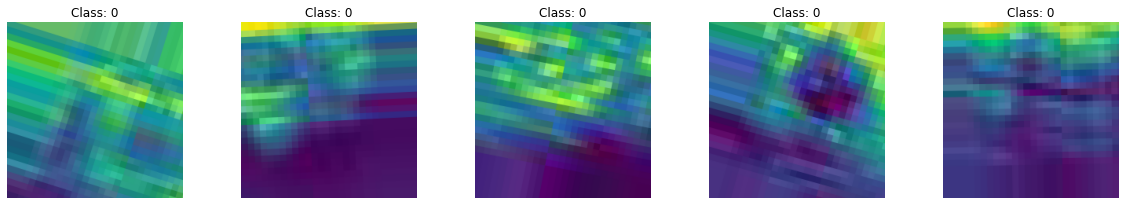

In [ ]:
labels = [k for k in train_genarator.class_indices]
sample_generate = train_genarator.next()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(5):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

##**Downloading pre-trained model VGG16**

In [ ]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output

58889256/58889256 [==============================] - 0s 0us/step


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
folders=glob(r"/content/drive/MyDrive/Breast_MNIST/Train/*")
print(len(folders))

2


##**Setting the number of output neurons**

In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='sigmoid')(x)
model=Model(inputs=vgg.input,outputs=prediction)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


##**Training the Model with data**

In [ ]:
history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=450,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/450
18/18 [==============================] - 105s 5s/step - loss: 0.9202 - accuracy: 0.6392 - val_loss: 0.5486 - val_accuracy: 0.7692
Epoch 2/450
18/18 [==============================] - 10s 584ms/step - loss: 0.5204 - accuracy: 0.7564 - val_loss: 0.5344 - val_accuracy: 0.7564
Epoch 3/450
18/18 [==============================] - 8s 456ms/step - loss: 0.5372 - accuracy: 0.7509 - val_loss: 0.5464 - val_accuracy: 0.7564
Epoch 4/450
18/18 [==============================] - 9s 517ms/step - loss: 0.5802 - accuracy: 0.7216 - val_loss: 0.5363 - val_accuracy: 0.7564
Epoch 5/450
18/18 [==============================] - 9s 521ms/step - loss: 0.5075 - accuracy: 0.7656 - val_loss: 0.4581 - val_accuracy: 0.8333
Epoch 6/450
18/18 [==============================] - 8s 458ms/step - loss: 0.5418 - accuracy: 0.7692 - val_loss: 0.4261 - val_accuracy: 0.8077
Epoch 7/450
18/18 [==============================] - 9s 520ms/step - loss: 0.4560 - accuracy: 0.7930 - val_loss: 0.4811 - val_accuracy: 0.7949

#**Evaluating the Data**

In [ ]:
model.evaluate(test_generator)

5/5 [==============================] - 1s 134ms/step - loss: 0.4796 - accuracy: 0.8077


[0.47957825660705566, 0.807692289352417]

##**Evaluating the performance of the models on the test dataset and reporting the results**

<ipython-input-27-7161e86fecb9>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator, 156 // BATCH_SIZE+1)



Classification Report

              precision    recall  f1-score   support

           0       0.42      0.24      0.30        42
           1       0.76      0.88      0.81       114

    accuracy                           0.71       156
   macro avg       0.59      0.56      0.56       156
weighted avg       0.67      0.71      0.68       156


Confusion Matrix



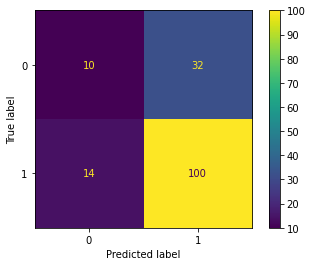

In [ ]:
Y_pred = model.predict_generator(test_generator, 156 // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
print('\nClassification Report\n')
target_names = ['0','1']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print('\nConfusion Matrix\n')
disp.plot()
plt.show()

##**Saving the Model in three Formats**

In [ ]:
model.save(r'/content/drive/MyDrive/Breast_MNIST/Models/vgg16_model_450_breastMNIST_jpg.h5')

In [ ]:
model.save('/content/drive/MyDrive/Breast_MNIST/Models/vgg16_model_450_breastMNIST_jpg.pkl')

In [ ]:
model.save(r'/content/drive/MyDrive/Breast_MNIST/Models/vgg16_model_450_breastMNIST_jpg.bin')

## **2. Novel Deep Neural Network for BreastMNIST**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#importing the Neural Network based modules from tensorflow package
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization

## **Loading the data using the .npz file**

In [ ]:
breast_cancer_data = np.load('Data/breastmnist.npz')

## **Taking the train, validation and test images into seperate arrays, and increasing the rank of each array to 4**

In [ ]:
x_train = breast_cancer_data['train_images']
x_val = breast_cancer_data['val_images']
x_test = breast_cancer_data['test_images']

y_train = breast_cancer_data['train_labels']
y_val = breast_cancer_data['val_labels']
y_test = breast_cancer_data['test_labels']

x_train = np.expand_dims(x_train,3)
x_val = np.expand_dims(x_val,3)
x_test = np.expand_dims(x_test,3)

## **Data Augmentation**

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                          featurewise_center=True,
                                                          featurewise_std_normalization=True,
                                                          rotation_range=20,
                                                          width_shift_range=0.2,
                                                          zoom_range=0.01,
                                                          height_shift_range=0.2,
                                                          horizontal_flip=True)

datagen_test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = datagen.flow(x_train, y_train)

val_gen = datagen.flow(x_val, y_val)

test_gen = datagen_test.flow(x_test, y_test)

## **Visualizing the ground truth**

C:\Users\vishn\anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


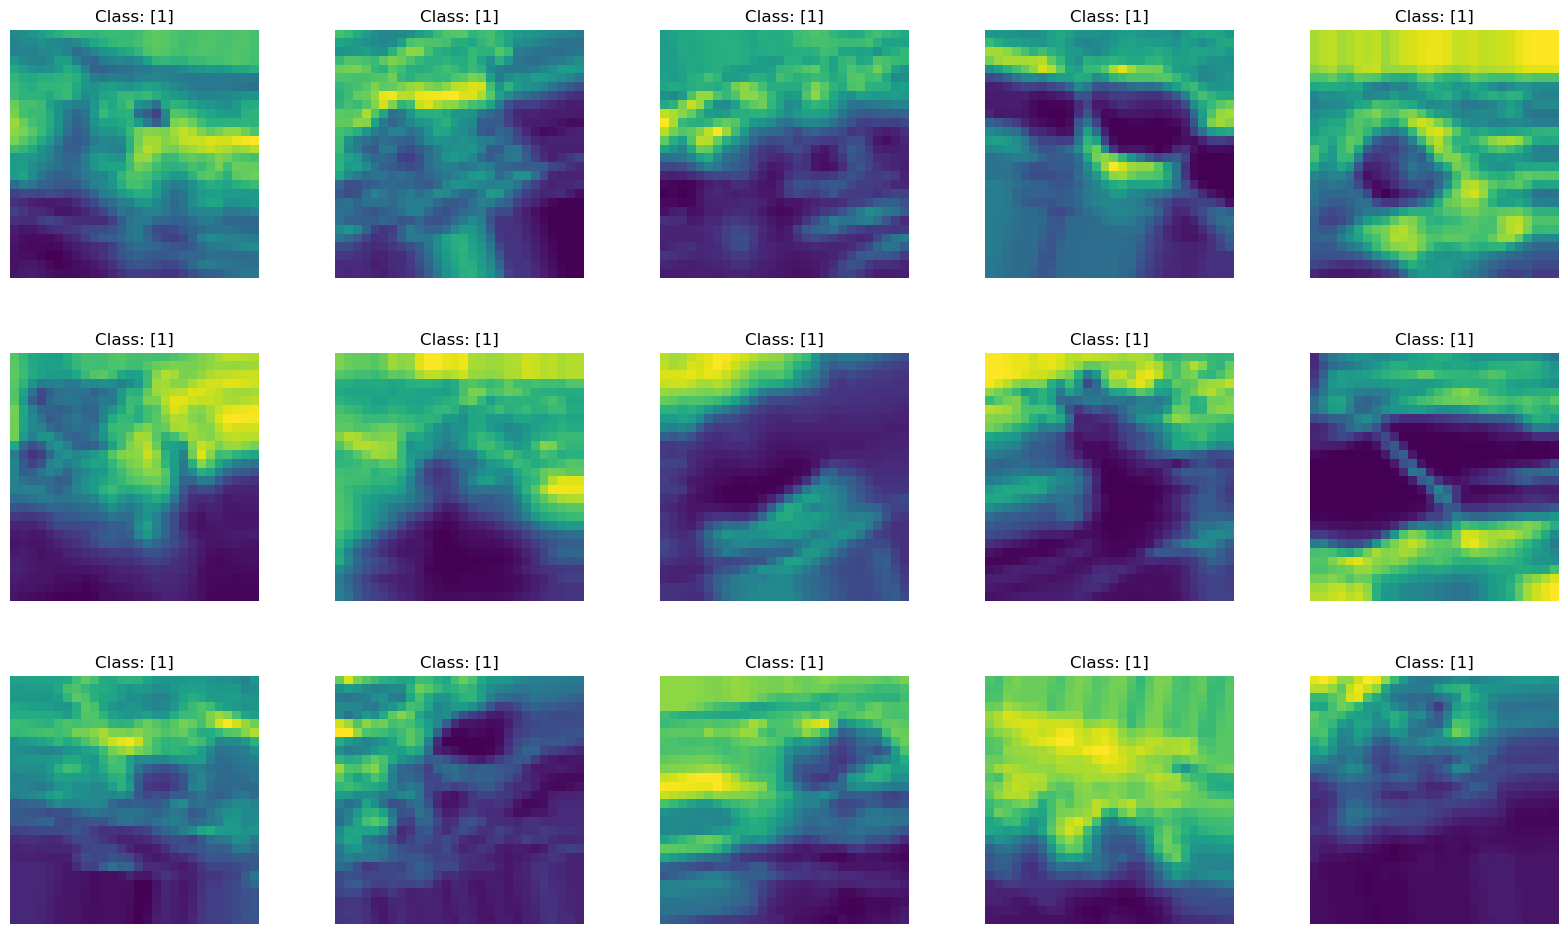

In [ ]:
labels = [k for k in train_gen.y]
sample_generate = train_gen.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

## **Model definition**

In [ ]:
#model with 2 convolution layers, 32 units and then 64 units with kernel size of 3x3 and relu activation fn
#the model also has a max pooling layer of pool size 2x2

model1 = Sequential([
    InputLayer(input_shape=(28,28,1)),
    Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_regularizer='l1_l2'),
    BatchNormalization(momentum=0.1),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer='l1_l2'),
    BatchNormalization(momentum=0.1),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer='l1_l2'),
    BatchNormalization(momentum=0.1),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(784,activation='tanh', kernel_regularizer='l1_l2'),
    BatchNormalization(momentum=0.1),
    
    Dense(28,activation='sigmoid', kernel_regularizer='l1_l2'),
    BatchNormalization(momentum=0.1),
    Dropout(0.1),
    Dense(2,activation='softmax')
])

BS=32

## **Compile the model with Adam algorithm, loss as sparse categorical entropy and measure the accuracy**

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics='accuracy')

## **Let's first fit the model on the normal data and preserve the weights, as we can see the model produces 84% validation accuracy at the end of 20 epochs**

In [ ]:
model1.fit(x_train/255, y_train, batch_size=20, epochs=100, validation_data=(x_val/255, y_val))

Epoch 1/100
28/28 [==============================] - 3s 37ms/step - loss: 43.8937 - accuracy: 0.6447 - val_loss: 33.7073 - val_accuracy: 0.5897
Epoch 2/100
28/28 [==============================] - 1s 31ms/step - loss: 26.3391 - accuracy: 0.6850 - val_loss: 19.2878 - val_accuracy: 0.8462
Epoch 3/100
28/28 [==============================] - 1s 31ms/step - loss: 15.2661 - accuracy: 0.7344 - val_loss: 11.2489 - val_accuracy: 0.7436
Epoch 4/100
28/28 [==============================] - 1s 31ms/step - loss: 8.9972 - accuracy: 0.7161 - val_loss: 6.8684 - val_accuracy: 0.7821
Epoch 5/100
28/28 [==============================] - 1s 31ms/step - loss: 5.8132 - accuracy: 0.7143 - val_loss: 4.2625 - val_accuracy: 0.7949
Epoch 6/100
28/28 [==============================] - 1s 30ms/step - loss: 3.5802 - accuracy: 0.7216 - val_loss: 2.9446 - val_accuracy: 0.7436
Epoch 7/100
28/28 [==============================] - 1s 31ms/step - loss: 2.9279 - accuracy: 0.7399 - val_loss: 2.5427 - val_accuracy: 0.7564


In [ ]:
model1.fit(x_train/255, y_train, batch_size=20, epochs=100, validation_data=(x_val/255, y_val))

Epoch 1/100
28/28 [==============================] - 1s 31ms/step - loss: 0.4365 - accuracy: 0.9817 - val_loss: 2.2720 - val_accuracy: 0.6795
Epoch 2/100
28/28 [==============================] - 1s 30ms/step - loss: 0.4082 - accuracy: 0.9927 - val_loss: 0.7633 - val_accuracy: 0.8846
Epoch 3/100
28/28 [==============================] - 1s 31ms/step - loss: 0.3756 - accuracy: 0.9945 - val_loss: 0.6850 - val_accuracy: 0.8974
Epoch 4/100
28/28 [==============================] - 1s 33ms/step - loss: 0.3926 - accuracy: 0.9853 - val_loss: 2.0922 - val_accuracy: 0.6795
Epoch 5/100
28/28 [==============================] - 1s 30ms/step - loss: 0.4553 - accuracy: 0.9597 - val_loss: 1.6889 - val_accuracy: 0.7692
Epoch 6/100
28/28 [==============================] - 1s 30ms/step - loss: 0.4357 - accuracy: 0.9744 - val_loss: 0.9738 - val_accuracy: 0.8205
Epoch 7/100
28/28 [==============================] - 1s 33ms/step - loss: 0.4214 - accuracy: 0.9744 - val_loss: 0.7332 - val_accuracy: 0.8333
Epoch 

## **3. Then using the same model, we will pass the augmented dataset and run it for another 200 epochs**

In [ ]:
history = model1.fit(train_gen, batch_size=x_train.shape[0], steps_per_epoch=x_train.shape[0] // BS, epochs=200, validation_data=val_gen)

Epoch 1/200


C:\Users\vishn\anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


17/17 [==============================] - 2s 65ms/step - loss: 1.2800 - accuracy: 0.7296 - val_loss: 0.9818 - val_accuracy: 0.7949
Epoch 2/200
17/17 [==============================] - 1s 50ms/step - loss: 1.4147 - accuracy: 0.7529 - val_loss: 1.6243 - val_accuracy: 0.7308
Epoch 3/200
17/17 [==============================] - 1s 50ms/step - loss: 2.2291 - accuracy: 0.7335 - val_loss: 2.6870 - val_accuracy: 0.7179
Epoch 4/200
17/17 [==============================] - 1s 53ms/step - loss: 2.4324 - accuracy: 0.7529 - val_loss: 2.1353 - val_accuracy: 0.7564
Epoch 5/200
17/17 [==============================] - 1s 50ms/step - loss: 1.9402 - accuracy: 0.7198 - val_loss: 1.6434 - val_accuracy: 0.7436
Epoch 6/200
17/17 [==============================] - 1s 59ms/step - loss: 1.5528 - accuracy: 0.7257 - val_loss: 1.3558 - val_accuracy: 0.7308
Epoch 7/200
17/17 [==============================] - 1s 60ms/step - loss: 1.3431 - accuracy: 0.7198 - val_loss: 1.1985 - val_accuracy: 0.7949
Epoch 8/200
17/17 

17/17 [==============================] - 1s 55ms/step - loss: 0.6941 - accuracy: 0.8113 - val_loss: 0.7261 - val_accuracy: 0.8333
Epoch 116/200
17/17 [==============================] - 1s 51ms/step - loss: 0.7157 - accuracy: 0.8093 - val_loss: 0.6773 - val_accuracy: 0.8590
Epoch 117/200
17/17 [==============================] - 1s 57ms/step - loss: 0.7126 - accuracy: 0.7996 - val_loss: 0.6515 - val_accuracy: 0.8205
Epoch 118/200
17/17 [==============================] - 1s 50ms/step - loss: 0.6948 - accuracy: 0.8074 - val_loss: 0.6753 - val_accuracy: 0.8333
Epoch 119/200
17/17 [==============================] - 1s 54ms/step - loss: 0.6536 - accuracy: 0.8230 - val_loss: 0.6546 - val_accuracy: 0.8205
Epoch 120/200
17/17 [==============================] - 1s 50ms/step - loss: 0.6439 - accuracy: 0.8444 - val_loss: 0.6496 - val_accuracy: 0.8590
Epoch 121/200
17/17 [==============================] - 1s 49ms/step - loss: 0.6618 - accuracy: 0.8152 - val_loss: 0.6104 - val_accuracy: 0.8718
Epoch 

Epoch 172/200
17/17 [==============================] - 1s 51ms/step - loss: 0.6819 - accuracy: 0.8132 - val_loss: 0.6929 - val_accuracy: 0.8462
Epoch 173/200
17/17 [==============================] - 1s 50ms/step - loss: 0.6813 - accuracy: 0.8152 - val_loss: 0.7466 - val_accuracy: 0.7821
Epoch 174/200
17/17 [==============================] - 1s 50ms/step - loss: 0.7506 - accuracy: 0.7724 - val_loss: 0.7338 - val_accuracy: 0.8077
Epoch 175/200
17/17 [==============================] - 1s 50ms/step - loss: 0.6775 - accuracy: 0.8132 - val_loss: 0.6382 - val_accuracy: 0.8205
Epoch 176/200
17/17 [==============================] - 1s 52ms/step - loss: 0.7163 - accuracy: 0.8035 - val_loss: 0.6289 - val_accuracy: 0.8974
Epoch 177/200
17/17 [==============================] - 1s 50ms/step - loss: 0.7153 - accuracy: 0.8132 - val_loss: 0.6595 - val_accuracy: 0.8333
Epoch 178/200
17/17 [==============================] - 1s 55ms/step - loss: 0.6782 - accuracy: 0.8152 - val_loss: 0.6253 - val_accuracy:

## **Model evaluation for the data that is not augmented**

In [ ]:
model1.evaluate(x_test/255, y_test)

5/5 [==============================] - 0s 13ms/step - loss: 1.2895 - accuracy: 0.8269


[1.2894737720489502, 0.8269230723381042]

## **Model evaluation for the data that is augmented**

In [ ]:
model1.evaluate(test_gen, verbose=1)

5/5 [==============================] - 0s 15ms/step - loss: 0.9792 - accuracy: 0.7692


[0.9792132377624512, 0.7692307829856873]

In [ ]:
model1.save("Breast_MNIST_CNN_own_model_no_data_aug.h5")

## **Measure the performance of the model with confusion matrix and classificaiton report which will compute the f1 score, recall and precision**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = model1.predict(x_test/255)

5/5 [==============================] - 0s 15ms/step


In [ ]:
data = []
for i in range(len(y_pred)):
    data.append(list(y_pred[i]))
    
class_arr = []
for i in data:
    #print(i)
    class_arr.append(i.index(max(i)))
    
true_arr = []
for i in y_test:
    true_arr.append(list(i))

In [ ]:
cm = confusion_matrix(true_arr, class_arr)

Text(0.5, 1.0, 'confusion matrix without data augmentation')

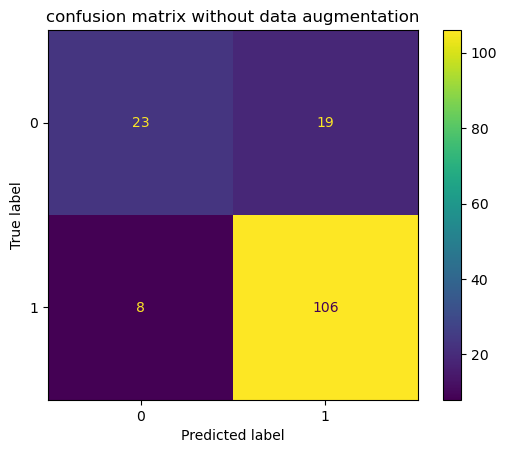

In [ ]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('confusion matrix without data augmentation')


In [ ]:
print('-------without data_augmentation-------\n',classification_report(true_arr, class_arr))

-------without data_augmentation-------
               precision    recall  f1-score   support

           0       0.74      0.55      0.63        42
           1       0.85      0.93      0.89       114

    accuracy                           0.83       156
   macro avg       0.79      0.74      0.76       156
weighted avg       0.82      0.83      0.82       156



In [ ]:
model1.save("Breast_MNIST_CNN_own_model_with_data_aug.h5")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = model1.predict(x_test/255)

5/5 [==============================] - 0s 15ms/step


In [ ]:
data = []
for i in range(len(y_pred)):
    data.append(list(y_pred[i]))
    
class_arr = []
for i in data:
    #print(i)
    class_arr.append(i.index(max(i)))
    
true_arr = []
for i in y_test:
    true_arr.append(list(i))

In [ ]:
cm = confusion_matrix(true_arr, class_arr)

Text(0.5, 1.0, 'confusion matrix with data augmentation')

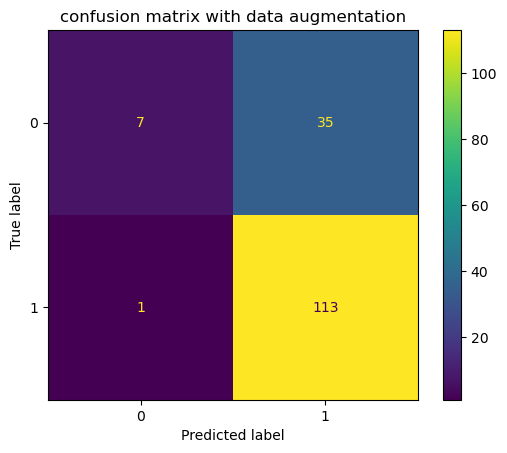

In [ ]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('confusion matrix with data augmentation')


In [ ]:
print('-------with data_augmentation-------\n',classification_report(true_arr, class_arr))

-------with data_augmentation-------
               precision    recall  f1-score   support

           0       0.88      0.17      0.28        42
           1       0.76      0.99      0.86       114

    accuracy                           0.77       156
   macro avg       0.82      0.58      0.57       156
weighted avg       0.79      0.77      0.71       156



#**4. Resnet50 Model for BloodMNIST**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

##**Loading the Dataset**

In [ ]:
train_path = '/content/drive/MyDrive/Datasets_for_CSW2/Blood_MNIST/Train'
test_path = '/content/drive/MyDrive/Datasets_for_CSW2/Blood_MNIST/Test'
val_path = '/content/drive/MyDrive/Datasets_for_CSW2/Blood_MNIST/Val'

##**Data Augmentation and Normalization**

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=90,
    shear_range = 0.2,
    zoom_range = 2,
    horizontal_flip = True,
    vertical_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=90,
    shear_range = 0.2,
    zoom_range = 2,
    horizontal_flip = True,
    vertical_flip = True
)

In [ ]:
train_gen = train_datagen.flow_from_directory(directory = train_path, target_size = (100,100), 
                                       batch_size = 32, class_mode = 'categorical')

Found 11959 images belonging to 8 classes.


In [ ]:
test_gen = test_datagen.flow_from_directory(directory = test_path, target_size = (100,100), 
                                       batch_size = 32, class_mode = 'categorical')

Found 3421 images belonging to 8 classes.


## **Visualising a subset of the data and the ground truth**

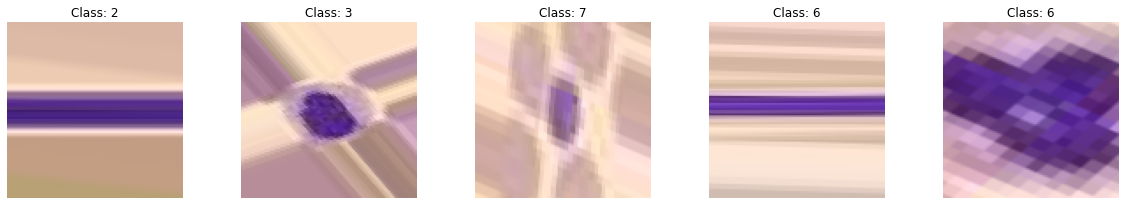

In [ ]:
labels = [k for k in train_gen.class_indices]
sample_generate = train_gen.next()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(5):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

##**Downloading pre-trained model ResNet50**

In [ ]:
IMAGE_SIZE = [100, 100]

In [ ]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   # 
)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob(train_path + '/*')
folders

['/content/drive/MyDrive/Datasets_for_CSW2/Blood_MNIST/Train/0',
 '/content/drive/MyDrive/Datasets_for_CSW2/Blood_MNIST/Train/1',
 '/content/drive/MyDrive/Datasets_for_CSW2/Blood_MNIST/Train/7',
 '/content/drive/MyDrive/Datasets_for_CSW2/Blood_MNIST/Train/3',
 '/content/drive/MyDrive/Datasets_for_CSW2/Blood_MNIST/Train/4',
 '/content/drive/MyDrive/Datasets_for_CSW2/Blood_MNIST/Train/6',
 '/content/drive/MyDrive/Datasets_for_CSW2/Blood_MNIST/Train/5',
 '/content/drive/MyDrive/Datasets_for_CSW2/Blood_MNIST/Train/2']

In [ ]:
blood_label = ['0', '1','2','3','4','5','6','7']

##**Setting the number of output neurons**

In [ ]:
x = Flatten() (resnet.output)

In [ ]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [ ]:
model = Model(inputs = resnet.input, outputs = prediction)

In [ ]:
from keras import optimizers
optm = optimizers.Adam(learning_rate=0.001)
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = optm,
    metrics = ['accuracy']
)

##**Training the Model with data**

In [ ]:
history = model.fit_generator(
    train_gen,
    validation_data = val_gen,
    epochs = 100,
    steps_per_epoch = len(train_gen),
    validation_steps = len(val_gen)
)

<ipython-input-32-4693b507057c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
374/374 [==============================] - 3169s 8s/step - loss: 2.3256 - accuracy: 0.2121 - val_loss: 1.9710 - val_accuracy: 0.2745
Epoch 2/100
374/374 [==============================] - 79s 212ms/step - loss: 2.0602 - accuracy: 0.2758 - val_loss: 1.9858 - val_accuracy: 0.2830
Epoch 3/100
374/374 [==============================] - 77s 207ms/step - loss: 2.0481 - accuracy: 0.2902 - val_loss: 1.9698 - val_accuracy: 0.2859
Epoch 4/100
374/374 [==============================] - 78s 208ms/step - loss: 1.9877 - accuracy: 0.3113 - val_loss: 1.9625 - val_accuracy: 0.3788
Epoch 5/100
374/374 [==============================] - 77s 207ms/step - loss: 1.9528 - accuracy: 0.3259 - val_loss: 1.7786 - val_accuracy: 0.3338
Epoch 6/100
374/374 [==============================] - 79s 211ms/step - loss: 1.8878 - accuracy: 0.3511 - val_loss: 1.8530 - val_accuracy: 0.3043
Epoch 7/100
374/374 [==============================] - 76s 204ms/step - loss: 1.9656 - accuracy: 0.3389 - val_loss: 2.3480 - 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save(r'/content/drive/MyDrive/Models_Blood/Resnet50_model_100_bloodMNIST_jpg.h5')

##**Evaluating the Data**

In [ ]:
model.evaluate(test_gen)

107/107 [==============================] - 11s 106ms/step - loss: 1.7121 - accuracy: 0.4882


[1.7121081352233887, 0.4881613552570343]

##**Evaluating the performance of the models on the test dataset and reporting the results**

In [ ]:
def evaluation_fn(y_true, y_predicted):
    '''The function will take the true values and the predicted values 
    and computes the confusion matrix for the multiple classes or binary classes and generates
    the classification report for all the values'''
    
    class_arr = []
    data = []
    for i in range(len(y_predicted)):
        data.append(list(y_predicted[i]))
        
    for i in data:
        class_arr.append(i.index(max(i)))
    
    true_arr = []
    for i in y_true:
        true_arr.append(list(i))
    
    
    print(classification_report(true_arr, class_arr))
    cm = confusion_matrix(true_arr, class_arr)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                          featurewise_center=True,
                                                          featurewise_std_normalization=True,
                                                          rotation_range=20,
                                                          width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          horizontal_flip=True)

datagen_test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = datagen.flow_from_directory('C://Users//vishn//Downloads/Blood_MNIST/Train/',target_size=(100,100))

val_gen = datagen.flow_from_directory('C://Users//vishn//Downloads/Blood_MNIST/Val/', target_size=(100,100))

test_gen = datagen_test.flow_from_directory('C://Users//vishn//Downloads/Blood_MNIST/Test/', target_size=(100,100))

Found 11959 images belonging to 8 classes.
Found 1712 images belonging to 8 classes.
Found 3421 images belonging to 8 classes.


In [ ]:
new_model = tf.keras.models.load_model('Resnet50_model_100_bloodMNIST_jpg (1).h5')

In [ ]:
new_model.evaluate(test_gen)

107/107 [==============================] - 44s 405ms/step - loss: 1.7121 - accuracy: 0.4882


[1.712123155593872, 0.4881613552570343]

In [ ]:
blood = np.load('bloodmnist.npz')

In [ ]:
x_test = blood['test_images']
y_true = blood['test_labels']

In [ ]:
y_pred = new_model.predict(test_gen)

107/107 [==============================] - 43s 402ms/step


In [ ]:
y_pred = new_model.predict(test_gen)

107/107 [==============================] - 43s 402ms/step


C:\Users\vishn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       244
           1       0.16      0.05      0.08       624
           2       0.00      0.00      0.00       311
           3       0.18      0.50      0.27       579
           4       0.06      0.17      0.09       243
           5       0.00      0.00      0.00       284
           6       0.18      0.18      0.18       666
           7       0.11      0.07      0.09       470

    accuracy                           0.15      3421
   macro avg       0.09      0.12      0.09      3421
weighted avg       0.11      0.15      0.11      3421



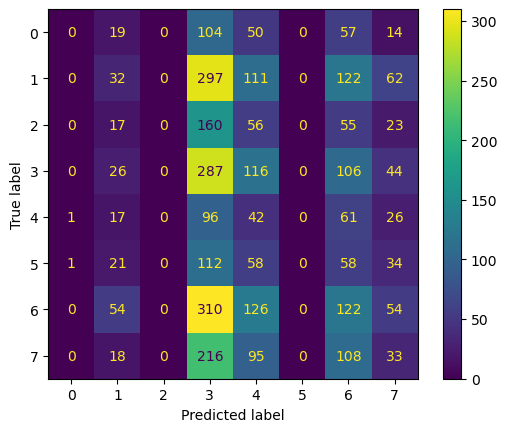

In [ ]:
evaluation_fn(y_true, y_pred)

In [ ]:
model.save(r'/content/drive/MyDrive/Models_Blood/Resnet50_model_100_bloodMNIST_jpg.pkl')

In [ ]:
model.save(r'/content/drive/MyDrive/Models_Blood/Resnet50_model_100_bloodMNIST_jpg.bin')

#**5. Novel Deep Neural Network for BloodMNIST**

In [ ]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt

from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.layers import Dense
import numpy 
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.layers import Flatten 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Loading the data using the .npz file**

In [ ]:
#import the data
data = numpy.load('/content/drive/MyDrive/Datasets_for_CSW2/bloodmnist.npz')
print(data.files)

['train_images', 'train_labels', 'val_images', 'val_labels', 'test_images', 'test_labels']


##**Taking the train, validation and test images into seperate arrays**

In [ ]:
# split into input (X) and output (y) variables
X_train = data['train_images']
y_train = data['train_labels']
X_test = data['val_images']
y_test = data['val_labels']
X_val = data['test_images']
y_val = data['test_labels']

## **Verifying that no records are missing**

In [ ]:
X_train.shape

(11959, 28, 28, 3)

In [ ]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28,3).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28,3).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 28, 28,3).astype('float32')

## **Normalize the data**

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [ ]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

num_classes = y_test.shape[1]
print(num_classes)

8


##**Model definition**

In [ ]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

##**Training the Model**

In [ ]:
# build the model
model = convolutional_model()

# fit the model
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/200
60/60 - 6s - loss: 1.3921 - accuracy: 0.5172 - val_loss: 0.9544 - val_accuracy: 0.6916 - 6s/epoch - 104ms/step
Epoch 2/200
60/60 - 7s - loss: 0.9046 - accuracy: 0.6793 - val_loss: 0.8387 - val_accuracy: 0.6974 - 7s/epoch - 110ms/step
Epoch 3/200
60/60 - 6s - loss: 0.7760 - accuracy: 0.7359 - val_loss: 0.7041 - val_accuracy: 0.7664 - 6s/epoch - 103ms/step
Epoch 4/200
60/60 - 5s - loss: 0.6963 - accuracy: 0.7714 - val_loss: 0.6255 - val_accuracy: 0.7956 - 5s/epoch - 90ms/step
Epoch 5/200
60/60 - 7s - loss: 0.6379 - accuracy: 0.7919 - val_loss: 0.6003 - val_accuracy: 0.8107 - 7s/epoch - 124ms/step
Epoch 6/200
60/60 - 5s - loss: 0.6025 - accuracy: 0.8011 - val_loss: 0.5641 - val_accuracy: 0.7891 - 5s/epoch - 88ms/step
Epoch 7/200
60/60 - 7s - loss: 0.5678 - accuracy: 0.8142 - val_loss: 0.5403 - val_accuracy: 0.8300 - 7s/epoch - 124ms/step
Epoch 8/200
60/60 - 5s - loss: 0.5372 - accuracy: 0.8217 - val_loss: 0.5073 - val_accuracy: 0.8277 - 5s/epoch - 89ms/step
Epoch 9/200
60/60 -

In [ ]:
model.save(r'/content/drive/MyDrive/Blood_npz_without_aug.pkl')

In [ ]:
model.save(r'/content/drive/MyDrive/Blood_npz_without_aug.h5')

In [ ]:
X_val = data['test_images']
y_val = data['test_labels']

In [ ]:
y_predicted = model.predict(X_val)

107/107 [==============================] - 1s 7ms/step


In [ ]:
len(y_predicted), len(y_val)

(3421, 3421)

##**Measure the performance of the model with confusion matrix and calssificaiton report which will compute the f1 score, recall and precision**

------------Classification report---------------

              precision    recall  f1-score   support

           0       0.92      0.45      0.60       244
           1       0.91      0.98      0.94       624
           2       0.67      0.93      0.78       311
           3       0.74      0.77      0.76       579
           4       0.92      0.69      0.79       243
           5       0.74      0.77      0.75       284
           6       0.96      0.91      0.93       666
           7       0.97      1.00      0.99       470

    accuracy                           0.85      3421
   macro avg       0.85      0.81      0.82      3421
weighted avg       0.86      0.85      0.85      3421

Confusion Matrix


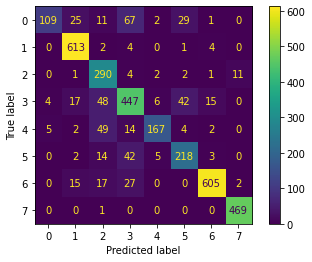

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt
def evaluation_fn(y_true, y_predicted):
    '''The function will take the true values and the predicted values 
    and computes the confusion matrix for the multiple classes or binary classes and generates
    the classification report for all the values'''
    
    class_arr = []
    data = []
    for i in range(len(y_predicted)):
        data.append(list(y_predicted[i]))
        
    for i in data:
        class_arr.append(i.index(max(i)))
    
    true_arr = []
    for i in y_true:
        true_arr.append(list(i))
    
    print('------------Classification report---------------')
    print()
    print(classification_report(true_arr, class_arr))
    print('Confusion Matrix')
    cm = confusion_matrix(true_arr, class_arr)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

evaluation_fn(y_val, y_predicted)

##**6. Novel Deep Neural Network for BloodMnsit**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as imlib
import itertools

## **Import all the neural network based libraries**

In [ ]:
#importing the Neural Network based modules from tensorflow package
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization

## **Loading the dataset**

In [ ]:
blood_data = np.load('bloodmnist.npz')

In [ ]:
blood_data.files

['train_images',
 'train_labels',
 'val_images',
 'val_labels',
 'test_images',
 'test_labels']

In [ ]:
blood_data['train_labels']

array([[7],
       [3],
       [6],
       ...,
       [1],
       [6],
       [4]], dtype=uint8)

In [ ]:
BATCH_SIZE = 32

In [ ]:
x_train = blood_data['train_images']
x_val = blood_data['val_images']
x_test = blood_data['test_images']

y_train = blood_data['train_labels']
y_val = blood_data['val_labels']
y_test = blood_data['test_labels']

## **Calculating the number of classes in the dataset**

In [ ]:
np.unique(y_train), np.unique(y_val), np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8))

In [ ]:
x_train.shape, x_val.shape, x_test.shape

((11959, 28, 28, 3), (1712, 28, 28, 3), (3421, 28, 28, 3))

## **Augment the dataset using keras**

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                          featurewise_center=True,
                                                          featurewise_std_normalization=True,
                                                          rotation_range=20,
                                                          width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          horizontal_flip=True)

datagen_test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = datagen.flow(x_train, y_train)

val_gen = datagen.flow(x_val, y_val)

test_gen = datagen_test.flow(x_test, y_test)

## **Visualizing the ground truth of labels by plotting**

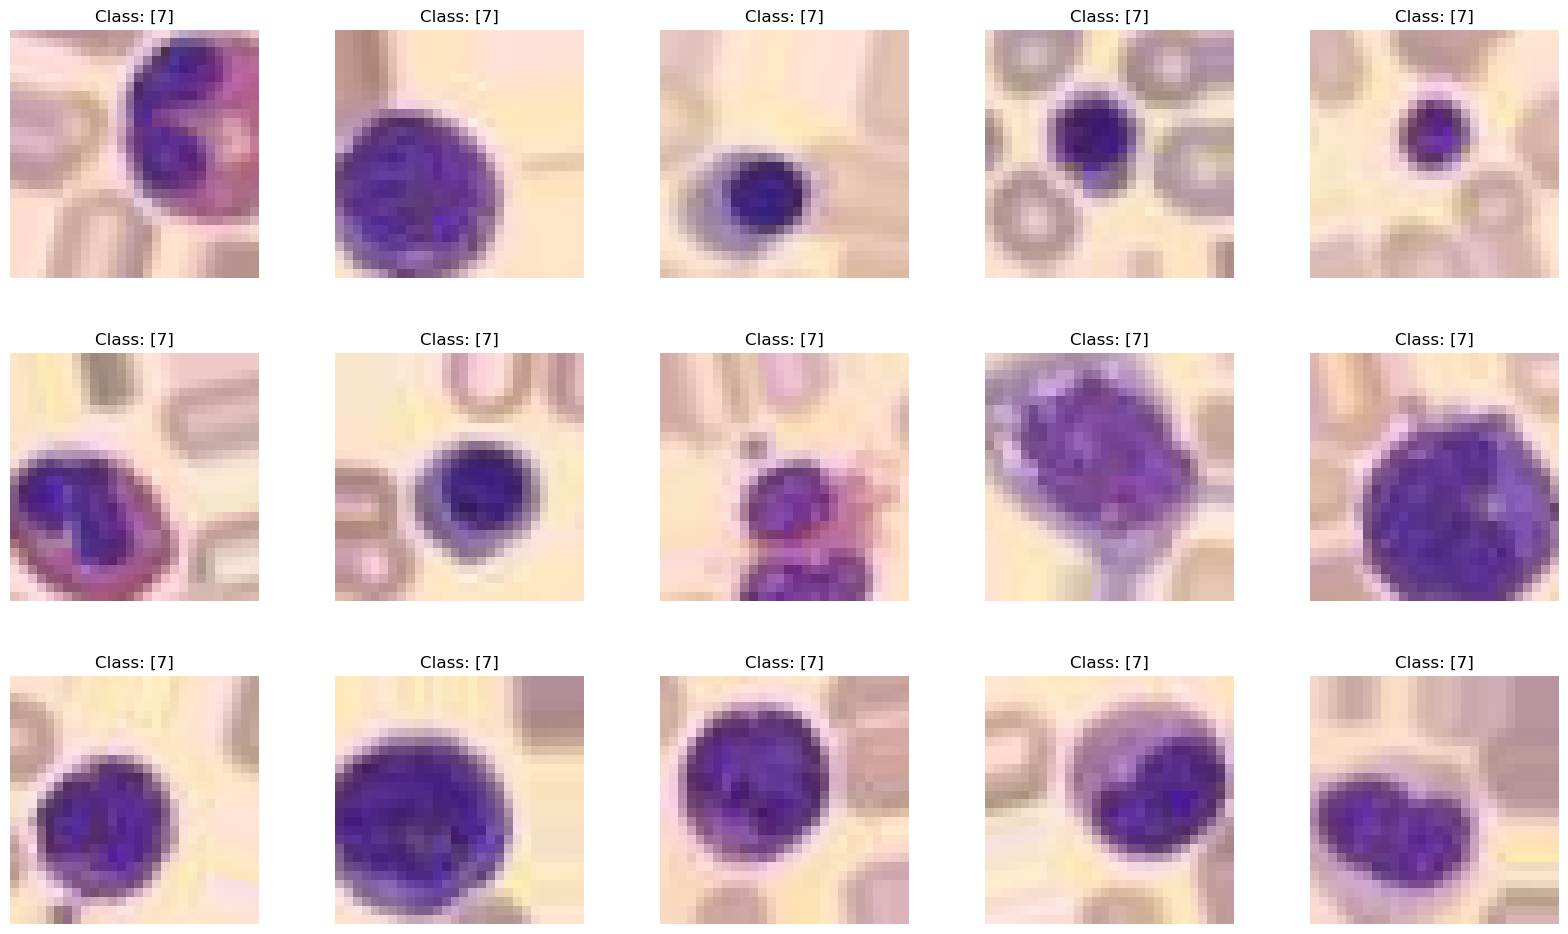

In [ ]:
labels = [k for k in train_gen.y]
sample_generate = train_gen.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

## **Define a Convolutional Neural Network model**

In [ ]:
#model with 2 convolution layers, 32 units and then 64 units with kernel size of 3x3 and relu activation fn
#the model also has a max pooling layer of pool size 2x2

model1 = Sequential([
    InputLayer(input_shape=(28,28,3)),
    Conv2D(128, kernel_size=(3, 3), activation='sigmoid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, kernel_size=(3, 3), activation='sigmoid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(32, kernel_size=(3, 3), activation='sigmoid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(784,activation='sigmoid'),
    BatchNormalization(),
    
    Dense(512,activation='sigmoid'),
    BatchNormalization(),
    Dropout(0.01),
    Dense(8,activation='softmax')
])

In [ ]:
model1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

## **Train the Neural Network on the data**

In [ ]:
model1.fit(train_gen, batch_size = 20, epochs=200, validation_data=val_gen) #callbacks=early_stop)

Epoch 1/200


C:\Users\vishn\anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


374/374 [==============================] - 21s 53ms/step - loss: 1.0135 - accuracy: 0.6418 - val_loss: 2.1804 - val_accuracy: 0.3534
Epoch 2/200
374/374 [==============================] - 20s 54ms/step - loss: 0.7081 - accuracy: 0.7353 - val_loss: 1.9977 - val_accuracy: 0.4725
Epoch 3/200
374/374 [==============================] - 22s 59ms/step - loss: 0.6174 - accuracy: 0.7720 - val_loss: 1.4103 - val_accuracy: 0.6127
Epoch 4/200
374/374 [==============================] - 20s 54ms/step - loss: 0.5722 - accuracy: 0.7851 - val_loss: 1.4038 - val_accuracy: 0.6011
Epoch 5/200
374/374 [==============================] - 20s 53ms/step - loss: 0.5333 - accuracy: 0.8053 - val_loss: 0.7022 - val_accuracy: 0.7506
Epoch 6/200
374/374 [==============================] - 20s 53ms/step - loss: 0.5031 - accuracy: 0.8190 - val_loss: 0.6524 - val_accuracy: 0.7553
Epoch 7/200
374/374 [==============================] - 20s 53ms/step - loss: 0.4665 - accuracy: 0.8306 - val_loss: 1.3883 - val_accuracy: 0.59

374/374 [==============================] - 20s 53ms/step - loss: 0.2128 - accuracy: 0.9267 - val_loss: 0.5297 - val_accuracy: 0.8224
Epoch 114/200
374/374 [==============================] - 20s 53ms/step - loss: 0.2136 - accuracy: 0.9223 - val_loss: 0.3944 - val_accuracy: 0.8651
Epoch 115/200
374/374 [==============================] - 20s 53ms/step - loss: 0.2018 - accuracy: 0.9271 - val_loss: 0.2232 - val_accuracy: 0.9200
Epoch 116/200
374/374 [==============================] - 20s 53ms/step - loss: 0.2151 - accuracy: 0.9234 - val_loss: 0.2542 - val_accuracy: 0.9118
Epoch 117/200
374/374 [==============================] - 20s 53ms/step - loss: 0.2097 - accuracy: 0.9243 - val_loss: 0.2766 - val_accuracy: 0.9071
Epoch 118/200
374/374 [==============================] - 20s 53ms/step - loss: 0.2049 - accuracy: 0.9267 - val_loss: 1.1046 - val_accuracy: 0.6630
Epoch 119/200
374/374 [==============================] - 20s 53ms/step - loss: 0.2075 - accuracy: 0.9245 - val_loss: 0.2157 - val_ac

Epoch 169/200
374/374 [==============================] - 20s 53ms/step - loss: 0.1934 - accuracy: 0.9298 - val_loss: 0.2721 - val_accuracy: 0.9095
Epoch 170/200
374/374 [==============================] - 20s 53ms/step - loss: 0.1948 - accuracy: 0.9303 - val_loss: 1.1431 - val_accuracy: 0.6530
Epoch 171/200
374/374 [==============================] - 21s 55ms/step - loss: 0.1809 - accuracy: 0.9357 - val_loss: 0.4693 - val_accuracy: 0.8335
Epoch 172/200
374/374 [==============================] - 20s 54ms/step - loss: 0.1772 - accuracy: 0.9358 - val_loss: 0.2503 - val_accuracy: 0.9030
Epoch 173/200
374/374 [==============================] - 20s 53ms/step - loss: 0.1897 - accuracy: 0.9334 - val_loss: 0.2862 - val_accuracy: 0.8984
Epoch 174/200
374/374 [==============================] - 20s 53ms/step - loss: 0.1897 - accuracy: 0.9309 - val_loss: 0.2237 - val_accuracy: 0.9229
Epoch 175/200
374/374 [==============================] - 20s 53ms/step - loss: 0.1843 - accuracy: 0.9329 - val_loss: 0

## **Evaluate the data on the trained model**

In [ ]:
model1.evaluate(test_gen, verbose=1)

107/107 [==============================] - 2s 16ms/step - loss: 0.4193 - accuracy: 0.8728


[0.4192522168159485, 0.8728442192077637]

In [ ]:
model1.fit(train_gen, batch_size = 20, epochs=9, validation_data=val_gen) #callbacks=early_stop)

Epoch 1/9
  2/374 [..............................] - ETA: 19s - loss: 0.2093 - accuracy: 0.9062

C:\Users\vishn\anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\keras\preprocessing\image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


374/374 [==============================] - 21s 56ms/step - loss: 0.1798 - accuracy: 0.9340 - val_loss: 0.2404 - val_accuracy: 0.9200
Epoch 2/9
374/374 [==============================] - 20s 53ms/step - loss: 0.1771 - accuracy: 0.9349 - val_loss: 0.6999 - val_accuracy: 0.7798
Epoch 3/9
374/374 [==============================] - 21s 56ms/step - loss: 0.1870 - accuracy: 0.9323 - val_loss: 0.2254 - val_accuracy: 0.9211
Epoch 4/9
374/374 [==============================] - 20s 53ms/step - loss: 0.1754 - accuracy: 0.9374 - val_loss: 0.6096 - val_accuracy: 0.8131
Epoch 5/9
374/374 [==============================] - 20s 54ms/step - loss: 0.1788 - accuracy: 0.9375 - val_loss: 0.2594 - val_accuracy: 0.9106
Epoch 6/9
374/374 [==============================] - 20s 54ms/step - loss: 0.1740 - accuracy: 0.9383 - val_loss: 0.1955 - val_accuracy: 0.9322
Epoch 7/9
374/374 [==============================] - 20s 54ms/step - loss: 0.1771 - accuracy: 0.9352 - val_loss: 0.2533 - val_accuracy: 0.9060
Epoch 8/9

In [ ]:
model1.evaluate(test_gen, verbose=1)

107/107 [==============================] - 2s 14ms/step - loss: 0.1577 - accuracy: 0.9450


[0.15765748918056488, 0.9450452923774719]

In [ ]:
model1.save("Blood_MNIST_CNN_own_model_best.h5")

In [ ]:
# load the saved model

In [ ]:
new_model = tf.keras.models.load_model('Blood_MNIST_CNN_own_model_best.h5')

In [ ]:
new_model.evaluate(test_gen, verbose=1)

107/107 [==============================] - 2s 19ms/step - loss: 0.1577 - accuracy: 0.9450


[0.15765751898288727, 0.9450452923774719]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = new_model.predict(x_test/255)

107/107 [==============================] - 2s 14ms/step


In [ ]:
data = []
for i in range(len(y_pred)):
    data.append(list(y_pred[i]))

In [ ]:
class_arr = []
for i in data:
    #print(i)
    class_arr.append(i.index(max(i)))

In [ ]:
y_test_arr = list(y_test)

In [ ]:
true_arr = []
for i in y_test:
    true_arr.append(list(i))

In [ ]:
len(true_arr)

3421

In [ ]:
len(class_arr)

3421

In [ ]:
cm = confusion_matrix(true_arr, class_arr)

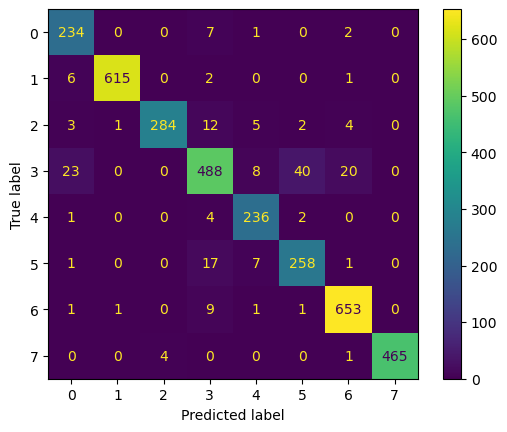

In [ ]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(true_arr, class_arr))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       244
           1       1.00      0.99      0.99       624
           2       0.99      0.91      0.95       311
           3       0.91      0.84      0.87       579
           4       0.91      0.97      0.94       243
           5       0.85      0.91      0.88       284
           6       0.96      0.98      0.97       666
           7       1.00      0.99      0.99       470

    accuracy                           0.95      3421
   macro avg       0.94      0.94      0.94      3421
weighted avg       0.95      0.95      0.94      3421

